In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Line Plots

Text(0, 0.5, 'y')

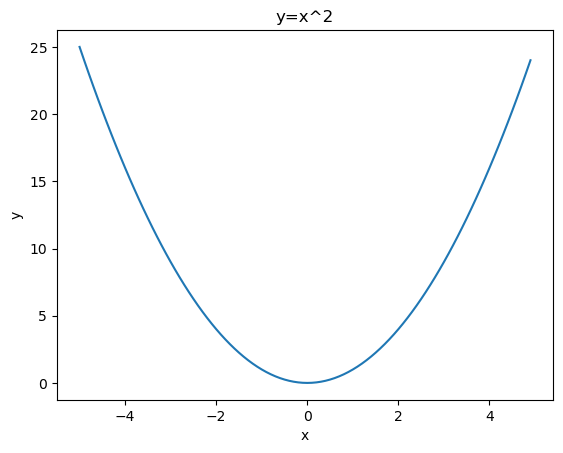

In [50]:
x = np.arange(-5, 5, 0.1)
y = np.square(x)

#create plot
plt.plot(x, y)


plt.title('y=x^2')

#add x label
plt.xlabel('x')

#add y label
plt.ylabel('y')

#show the chart
#plt.show()

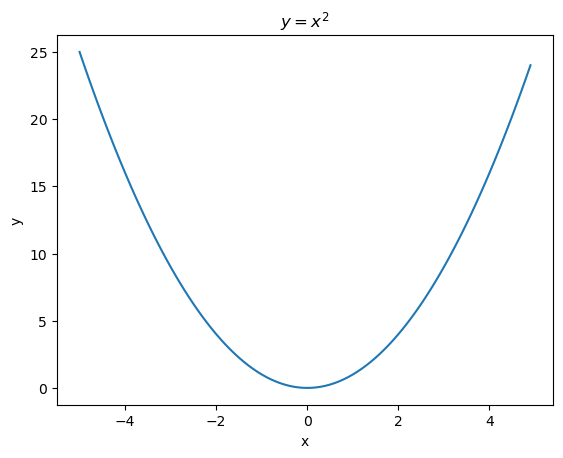

In [51]:
x = np.arange(-5, 5, 0.1)
y = np.square(x)

#create plot
plt.plot(x, y)

#add title use '$' for formatting
plt.title('$y=x^2$')

#add x label
plt.xlabel('x')

#add y label
plt.ylabel('y')

#show the chart w/o extras
plt.show()

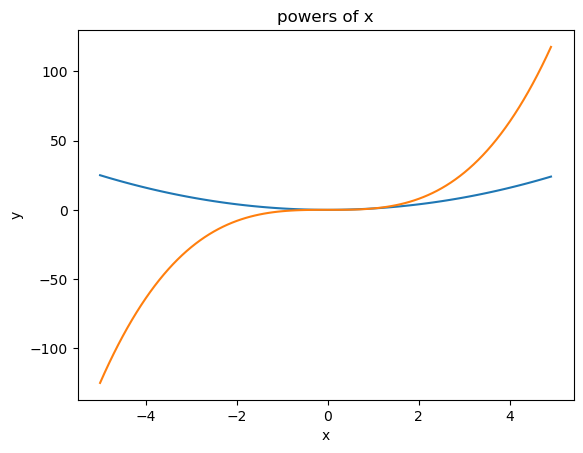

In [52]:
y2 = x ** 3

plt.plot(x,y)
plt.plot(x, y2)
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

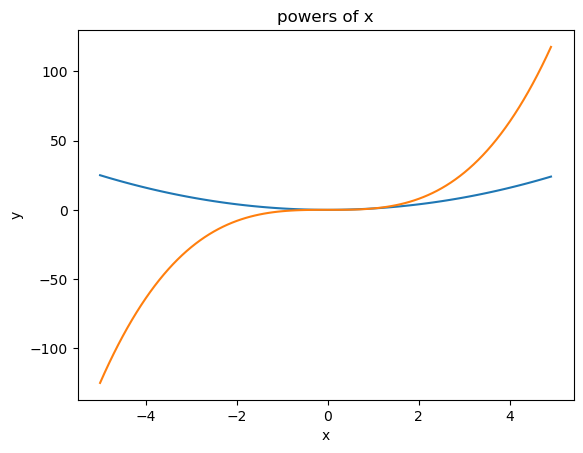

In [53]:
y2 = x ** 3

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- Nothing happens, yet, need to actually add the legend

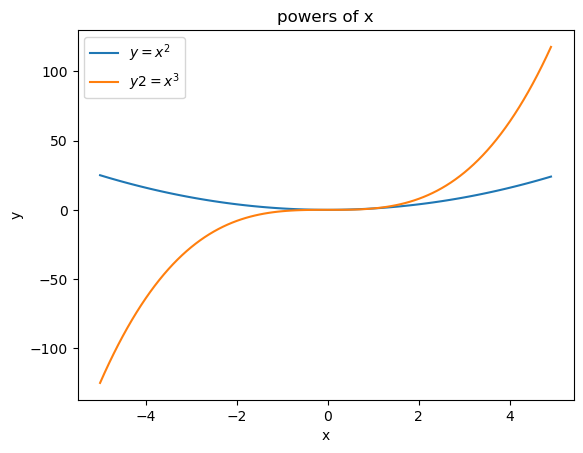

In [54]:
y2 = x ** 3

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

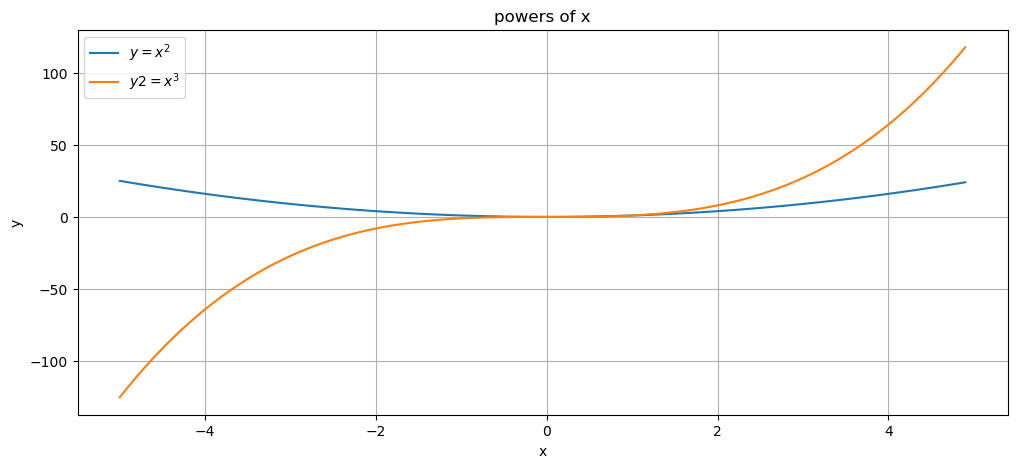

<Figure size 640x480 with 0 Axes>

In [55]:
y2 = x ** 3

#change size
plt.figure(figsize = (12,5))

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')

#add legend
plt.legend()

#add grid
plt.grid()

plt.show()

#save the figure
plt.savefig("figure1.png")

# Histograms

In [56]:
df = pd.read_csv('titanic.csv')

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.shape

(891, 12)

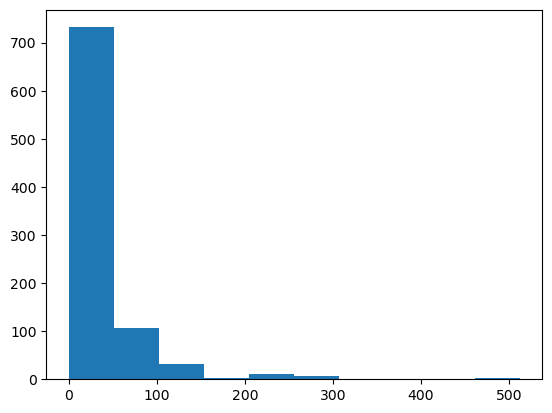

In [59]:
#plot distribution of the fare

plt.hist(df.Fare)
plt.show()

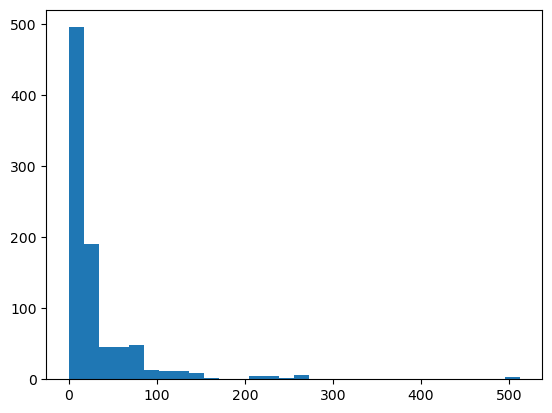

In [60]:
plt.hist(df.Fare, bins = 30)
plt.show()

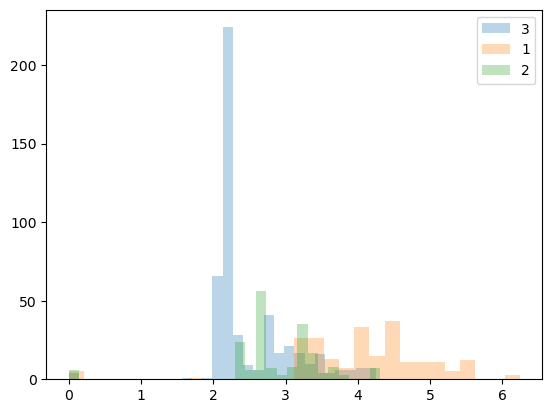

In [61]:
df['log_fare'] = np.log(1 + df.Fare)

for c in df.Pclass.unique():
    plt.hist(df.loc[df.Pclass == c, 'log_fare'],
            bins = 30, # num of bins
            alpha = 0.3, #opacity level
            label = c) #label the classes
    
plt.legend()
plt.show()

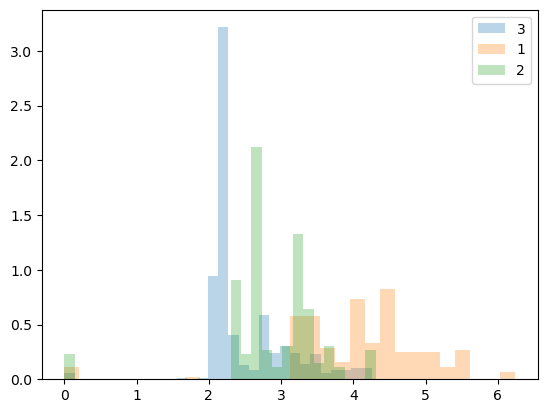

In [62]:
#probabilyt distribution
df['log_fare'] = np.log(1 + df.Fare)

for c in df.Pclass.unique():
    plt.hist(df.loc[df.Pclass == c, 'log_fare'],
            bins = 30, # num of bins
            alpha = 0.3, #opacity level
            label = c,#label the classes
            density = True) #show probability distrubution
    
plt.legend()
plt.show()

- Can see w/ distribution that class 2 is paying more than is simply represented in the original histogram which accounts for the number of fares, rather than the price. There is some overlap in all the classes. 

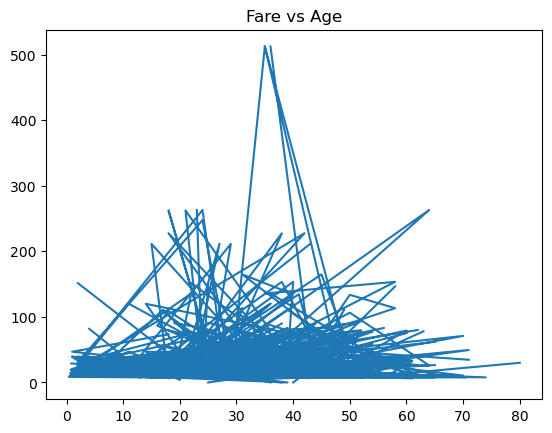

In [63]:
#example of what not to do with two continuous variables
plt.plot(df.Age, df.Fare)
plt.title('Fare vs Age')
plt.show()

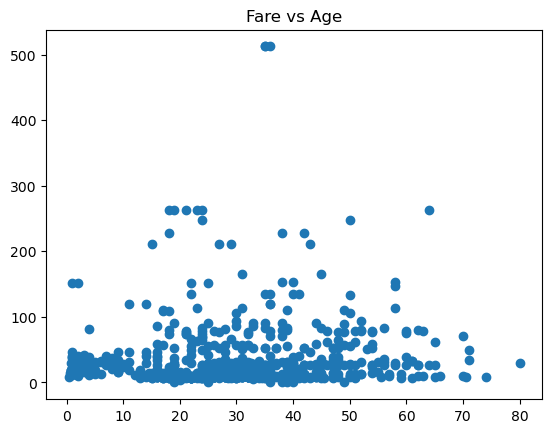

In [64]:
#example of what to do with two continuous variables
plt.scatter(df.Age, df.Fare) #(x, y)
plt.title('Fare vs Age')
plt.show()

In [65]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
log_fare         0
dtype: int64

In [66]:
df.shape

(891, 13)

In [67]:
#drop nan values

df.dropna(inplace = True, subset = ['Fare', 'Age'])
df.shape

(714, 13)

# Linear Regression to see line of best fit

In [68]:
from sklearn.linear_model import LinearRegression

#create model
model = LinearRegression()

#fit model
model.fit(df.Age.values.reshape(-1, 1), df.Fare.values.reshape(-1, 1)) #reshaped because it expects a 2D array aka [:, None]

x = np.arange(df.Age.min(), df.Age.max(), 0.1).reshape(-1, 1)

y = model.predict(x)

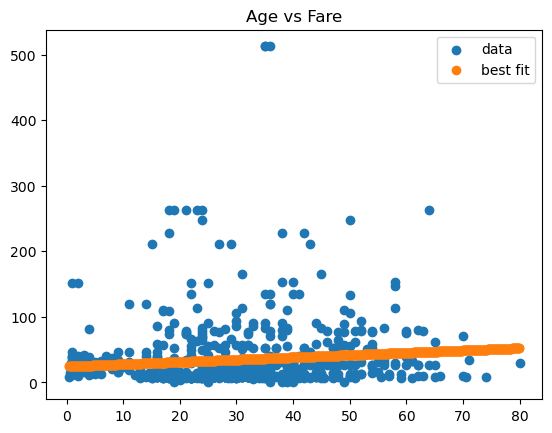

In [69]:
plt.scatter(df.Age, df.Fare, label = 'data')
plt.scatter(x, y, label = 'best fit')

plt.title('Age vs Fare')
plt.legend()
plt.show()

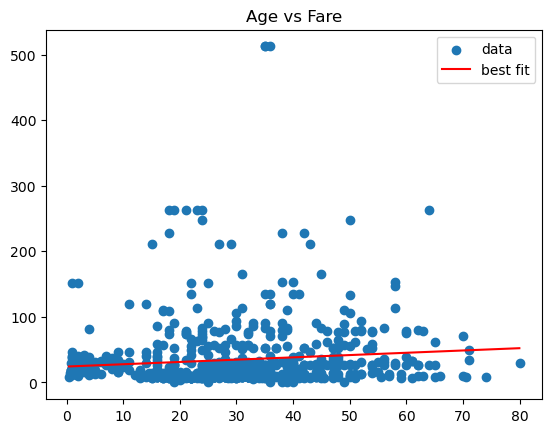

In [70]:
plt.scatter(df.Age, df.Fare, label = 'data')
plt.plot(x, y, label = 'best fit', c = 'r')

plt.title('Age vs Fare')
plt.legend()
plt.show()

# Subplots

/var/folders/2k/xc29_ql926g_35kwhcqh7j080000gp/T/ipykernel_94380/3727438037.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


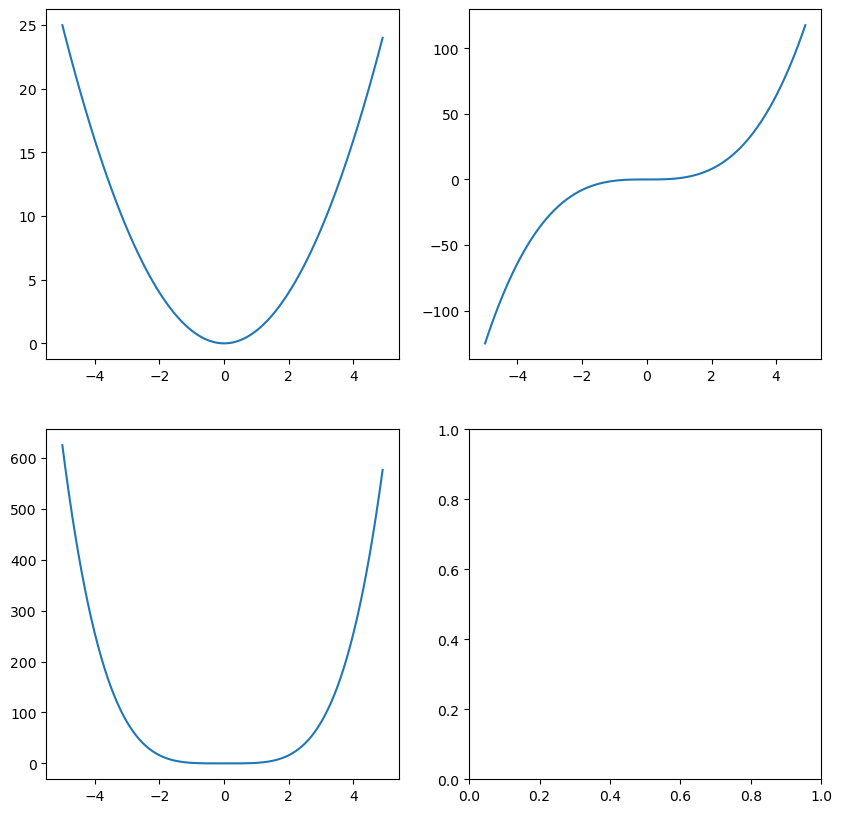

In [72]:
from PIL import Image
x = np.arange(-5, 5, 0.1)
y = np.square(x)

y1 = x ** 3
y2 = x ** 4

#img = np.array(Image.open("./scikit-learn-logo.png")) how to plot an image, put it in a numpy array
fig, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0][0].plot(x,y)
ax[0][1].plot(x, y1)
ax[1][0].plot(x, y2)

#ax[1][1].imshow(img) #how to plot the image

fig.show()
breakpoint()


/var/folders/2k/xc29_ql926g_35kwhcqh7j080000gp/T/ipykernel_94380/594429305.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


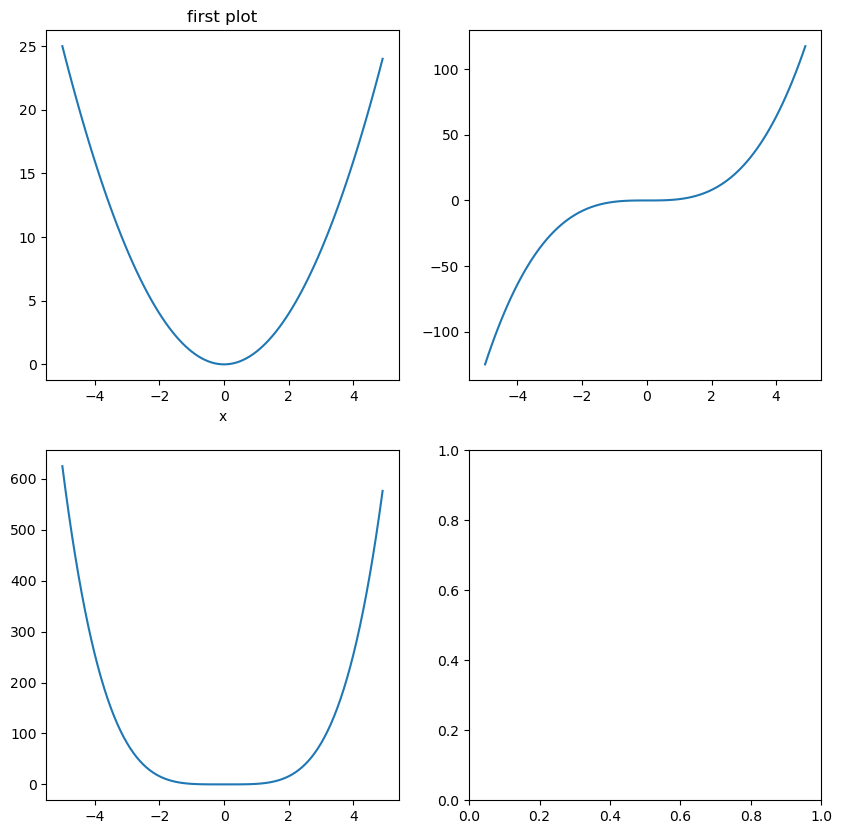

In [73]:
from PIL import Image
x = np.arange(-5, 5, 0.1)
y = np.square(x)

y1 = x ** 3
y2 = x ** 4

#img = np.array(Image.open("./scikit-learn-logo.png")) how to plot an image, put it in a numpy array
fig, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0][0].plot(x,y)
ax[0][0].set_xlabel('x')
ax[0][0].set_title('first plot')
ax[0][1].plot(x, y1)

ax[1][0].plot(x, y2)

#ax[1][1].imshow(img) #how to plot the image

fig.show()
breakpoint()


# Seaborn

In [74]:
import seaborn as sns

In [75]:
from sklearn.datasets import load_iris

In [76]:
data = load_iris()

In [77]:
data #its a dictionary, so have to create a dataframe

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [79]:
df = pd.DataFrame(data["data"], columns=data['feature_names'])

df['target'] = [data['target_names'][i] for i in data['target']] #list comprehension to convert the 0, 1, 2 into actual names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


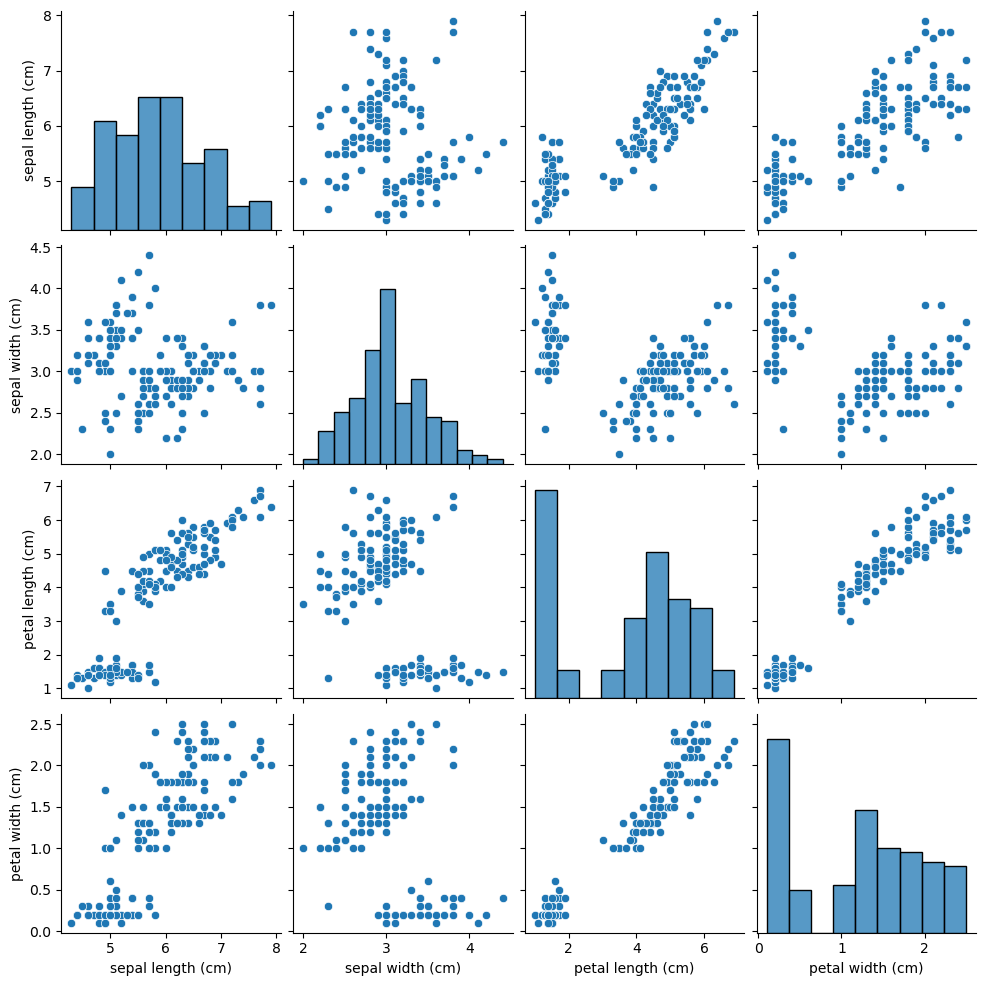

In [80]:
sns.pairplot(df)

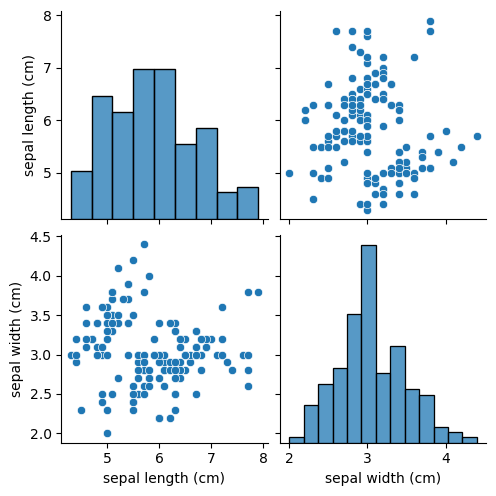

In [84]:
sns.pairplot(df, vars=df.columns[:2]) #get first two columns

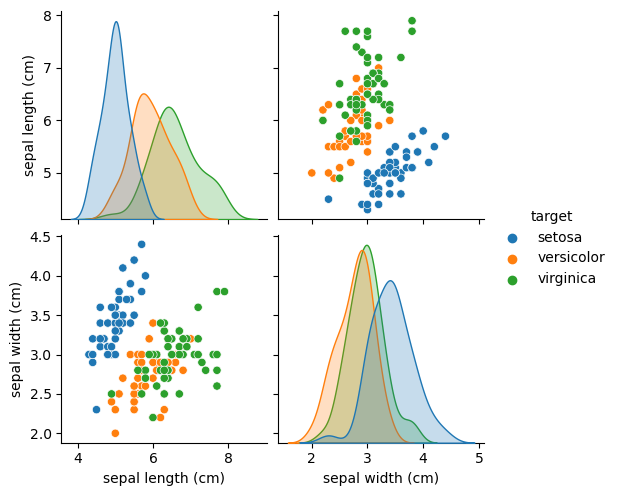

In [85]:
sns.pairplot(df, 
             vars=df.columns[:2],
            hue ='target') #get first two columns

- Shows KDE (kernal density estimator) because the hue argument was added